### LSE Data Analytics 

# Course 2 Assignment: Data Analytics using Python

## Context

The UK government is boosting its efforts to **increase vaccination rates through marketing campaigns to promote the COVID vaccine**.

This notebook includes a **data analysis performed to identify trends and patterns that can be used to inform its marketing approach** to increase the number of fully vaccinated people, taking into account the **COVID-19 UK data (from January 2020 to October 2021)** provided:
- *covid_19_uk_cases.csv*: cases data, including the number of deaths, cases, recovered, and hospitalised cases.
- *covid_19_uk_vaccinated.csv*: vaccination data, including the number of first and second dose cases.


## Github repo

- [Hyperlink including all documents](https://github.com/joaoppdecarvalho/LSE_DA_C2_COVID_analysis) 

!['My Github screenshot](https://raw.githubusercontent.com/joaoppdecarvalho/LSE_DA_C2_COVID_analysis/main/Github_screenshot_Joao_Carvalho.png)


#  
# <center>Data analysis using Python</center>

## 1. Environment preparation

In [1]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import datetime

# Load the data sets provided
cov = pd.read_csv('covid_19_uk_cases.csv')
vac = pd.read_csv('covid_19_uk_vaccinated.csv')
twitter = pd.read_csv('tweets.csv')

## 2. Explore datasets

### 2.1. "Cases" dataset

In [2]:
# Identify the variables type and number of rows, respectively
print(cov.dtypes)
print(cov.shape)

# Show first and last 5 rows
print(cov.head())
print(cov.tail())

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object
(7584, 12)
  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        

### 2.2. "Vaccination" dataset

In [3]:
# Identify the variables type and number of rows, respectively
print(vac.dtypes)
print(vac.shape)

# Show first and last 5 rows
print(vac.head())
print(vac.tail())

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object
(7584, 11)
  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Car

## 3. Dataset merged and analysis

### 3.1. Merge and explore

In [4]:
# Merge Datasets
covid = pd.merge(cov, vac, how='inner', on = ['Province/State', 'Date'])

# Keep only the necessary columns for analysis.
covid=covid[['Province/State', 'Date', 
             'First Dose', 'Second Dose', 
             'Deaths', 'Cases', 'Recovered', 'Hospitalised']]

# View first five rows
covid.head()

,Province/State,Date,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,2020-01-22,0,0,0.0,0.0,0.0,0.0
1,Anguilla,2020-01-23,0,0,0.0,0.0,0.0,0.0
2,Anguilla,2020-01-24,0,0,0.0,0.0,0.0,0.0
3,Anguilla,2020-01-25,0,0,0.0,0.0,0.0,0.0
4,Anguilla,2020-01-26,0,0,0.0,0.0,0.0,0.0


In [5]:
# Check data format
covid.dtypes

Province/State     object
Date               object
First Dose          int64
Second Dose         int64
Deaths            float64
Cases             float64
Recovered         float64
Hospitalised      float64
dtype: object

In [6]:
# Convert "Date" column to date type format
covid['Date'] = pd.to_datetime(covid['Date'])

In [7]:
# Check some stats about our data
covid.describe()

,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,6192.822257,5913.547600,6210.202321,2.147082e+05,454.691242,685.228568
std,11439.883647,10846.410258,24860.790148,1.007557e+06,1010.642337,819.256635
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,0.000000,0.000000,1.000000,1.685000e+02,13.000000,390.000000
75%,7505.500000,8338.000000,25.000000,1.585000e+03,312.000000,955.750000
max,94038.000000,69619.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


### 3.2. Missing data

In [8]:
# Determine the number of rows with missing values
covid_na = covid[covid.isna().any(axis=1)]

# In the case of missing values, show the cases
if len(covid_na)>0:
    print (covid_na)
else:
    print ("No rows with missing values")

    Province/State       Date  First Dose  Second Dose  Deaths  Cases  \
875        Bermuda 2020-09-21           0            0     NaN    NaN   
876        Bermuda 2020-09-22           0            0     NaN    NaN   

     Recovered  Hospitalised  
875        NaN           NaN  
876        NaN           NaN  


In [9]:
# Data analysis of Bermuda rows in the same month to decide how to handle with missing data
covid.loc[(covid['Date'].dt.strftime('%Y-%m') == '2020-09') 
          & (covid['Province/State']=="Bermuda")]

,Province/State,Date,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised
855,Bermuda,2020-09-01,0,0,9.0,172.0,157.0,52.0
856,Bermuda,2020-09-02,0,0,9.0,172.0,157.0,48.0
857,Bermuda,2020-09-03,0,0,9.0,174.0,157.0,49.0
858,Bermuda,2020-09-04,0,0,9.0,175.0,158.0,49.0
859,Bermuda,2020-09-05,0,0,9.0,175.0,158.0,49.0
860,Bermuda,2020-09-06,0,0,9.0,175.0,158.0,49.0
861,Bermuda,2020-09-07,0,0,9.0,175.0,158.0,54.0
862,Bermuda,2020-09-08,0,0,9.0,175.0,158.0,54.0
863,Bermuda,2020-09-09,0,0,9.0,177.0,159.0,55.0
864,Bermuda,2020-09-10,0,0,9.0,177.0,160.0,57.0


In [10]:
# Replace missing data with the preceding value
covid = covid.fillna(method='ffill')

# check previous missing data updated
covid.iloc[875:877]

,Province/State,Date,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,2020-09-21,0,0,9.0,180.0,166.0,84.0
876,Bermuda,2020-09-22,0,0,9.0,180.0,166.0,84.0


### 3.3. Data exploration - behaviour and identify incremental and acumulative columns

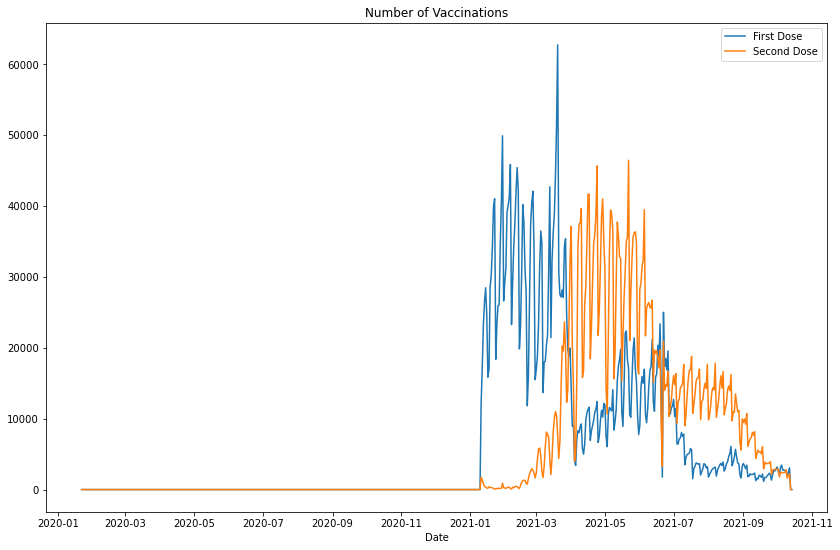

In [11]:
# Plot Vaccines behaviour over the time
vaccines_columns = ['First Dose', 'Second Dose']
fig, ax = plt.subplots(figsize=(14, 9))
for each in vaccines_columns:
    sns.lineplot(data = covid, x = 'Date', y = each, label = str(each), ci = None)

plt.title(f"Number of Vaccinations")
plt.ylabel('')
plt.show()

Text(0, 0.5, '')

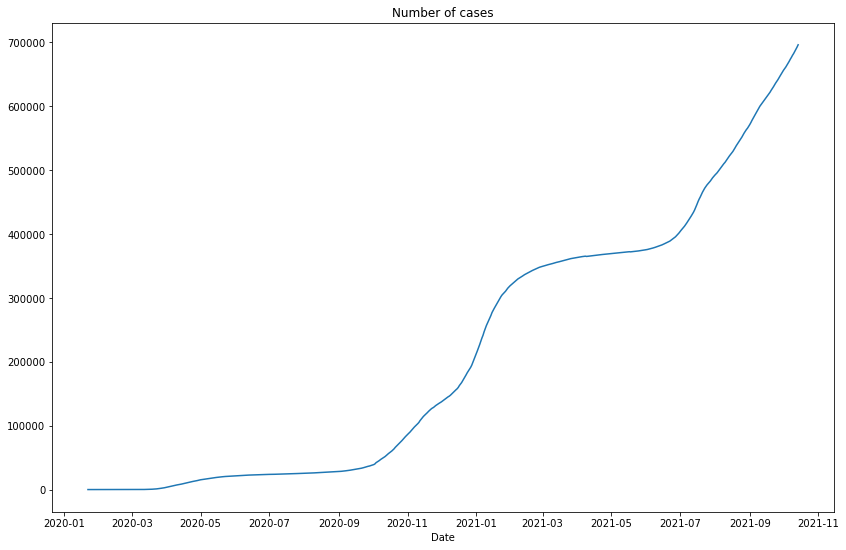

In [12]:
# Plot number of cases over the time
fig, ax = plt.subplots(figsize=(14, 9))
sns.lineplot(data = covid, x = 'Date', y = 'Cases', ci = None)
plt.title(f"Number of cases")
plt.ylabel('')

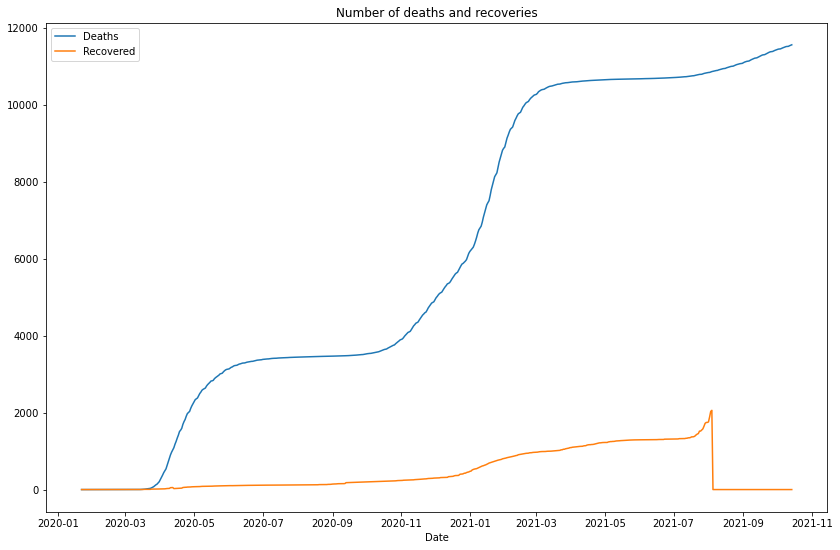

In [13]:
# Plot number of cases over the time
mov_columns = ['Deaths', 'Recovered']
fig, ax = plt.subplots(figsize=(14, 9))
for each in mov_columns:
    sns.lineplot(data = covid, x = 'Date', y = each, label = str(each), ci = None)

plt.title(f"Number of deaths and recoveries")
plt.ylabel('')
plt.show()

Text(0, 0.5, '')

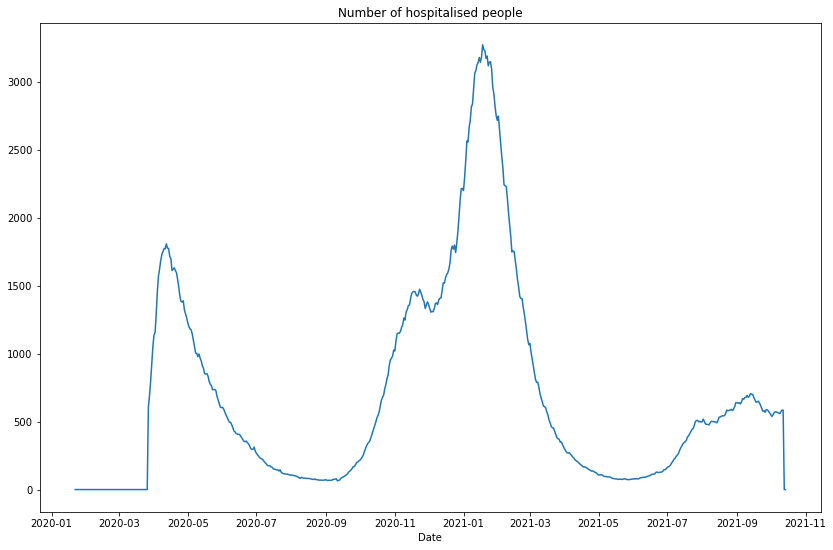

In [14]:
# Plot hospitalised variable over the time
fig, ax = plt.subplots(figsize=(14, 9))
sns.lineplot(data = covid, x = 'Date', y = 'Hospitalised', ci = None)
plt.title(f"Number of hospitalised people")
plt.ylabel('')

### 3.4. Calculate new columns for further analysis

In [15]:
# Obtain cumulative columns for vaccines
covid['First Dose_cum'] = covid.groupby(['Province/State'])['First Dose'].cumsum()
covid['Second Dose_cum'] = covid.groupby(['Province/State'])['Second Dose'].cumsum()

# Calculate number of people that has the first dose and do not have the second doses
covid['Only First Dose']= covid['First Dose_cum']-covid['Second Dose_cum']

# Obtain incremental columns for cases, deaths and recoveries
covid['Cases_inc'] = (covid.groupby('Province/State')['Cases'].diff()
                               .fillna(covid['Cases'], downcast='infer'))

covid['Deaths_inc'] = (covid.groupby('Province/State')['Deaths'].diff()
                               .fillna(covid['Deaths'], downcast='infer'))

covid['Recovered_inc'] = (covid.groupby('Province/State')['Recovered'].diff()
                               .fillna(covid['Recovered'], downcast='infer'))

# Check dataset updated
covid.head()

,Province/State,Date,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,First Dose_cum,Second Dose_cum,Only First Dose,Cases_inc,Deaths_inc,Recovered_inc
0,Anguilla,2020-01-22,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,Anguilla,2020-01-23,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,Anguilla,2020-01-24,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,Anguilla,2020-01-25,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,Anguilla,2020-01-26,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


## 4. Data analysis

### 4.1. Cases, deaths and recoveries - overall view

#### Accumulated number of cases and deaths, latest data

In [16]:
# Subset data only with the most recent date available
cases_lastdate = covid.sort_values(by=['Date'], ascending=False)
cases_lastdate = cases_lastdate.drop_duplicates(subset='Province/State', keep='first')

cases_lastdate = cases_lastdate[["Province/State", "Cases", "Deaths"]]

# Order subset by cases column
cases_lastdate = cases_lastdate.sort_values(by=['Cases'], ascending=False)

# Reset index and start from 1 to visualise the number of regions
cases_lastdate=cases_lastdate.reset_index(drop=True)
cases_lastdate.index = cases_lastdate.index + 1

# Format columns for a better viualisation
cases_lastdate.loc[:, "Cases"] = cases_lastdate["Cases"].map('{:,.0f}'.format)
cases_lastdate.loc[:, "Deaths"] = cases_lastdate["Deaths"].map('{:,.0f}'.format)

# show the number of cases and deaths on the latest data
cases_lastdate

,Province/State,Cases,Deaths
1,Others,"8,317,439","138,237"
2,Channel Islands,"12,135",100
3,Isle of Man,"8,343",54
4,Gibraltar,"5,727",97
5,Bermuda,"5,548",95
6,Turks and Caicos Islands,"2,910",23
7,British Virgin Islands,"2,725",37
8,Cayman Islands,"1,011",2
9,Anguilla,644,1
10,Falkland Islands (Malvinas),69,0


Text(0.5, 1.0, 'Number of deaths per month')

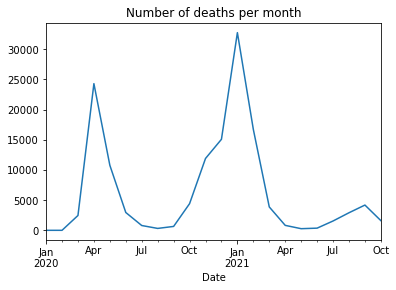

In [17]:
# Obtain the number of deaths per month and plot
covid_month_deaths_inc= covid.resample('M', on='Date')['Deaths_inc'].sum()
covid_month_deaths_inc.plot()
plt.title(f"Number of deaths per month")

Text(0.5, 1.0, 'Number of cases per month')

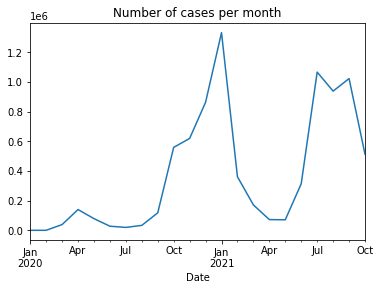

In [18]:
# Obtain the number of cases per month and plot
covid_month_cases_inc= covid.resample('M', on='Date')['Cases_inc'].sum()
covid_month_cases_inc.plot()
plt.title(f"Number of cases per month")

Text(0.5, 1.0, 'Number of recoveries per month')

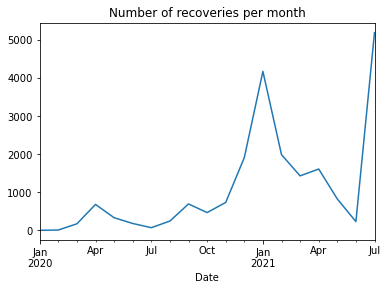

In [19]:
# Obtain the number of recoveries per month
covid_month_recoveries_inc= covid.resample('M', on='Date')['Recovered_inc'].sum()

# Remove last months of recoveries that do not have values
covid_month_recoveries_inc=covid_month_recoveries_inc.drop(covid_month_recoveries_inc.index[-3:])

covid_month_recoveries_inc.plot()
plt.title(f"Number of recoveries per month")

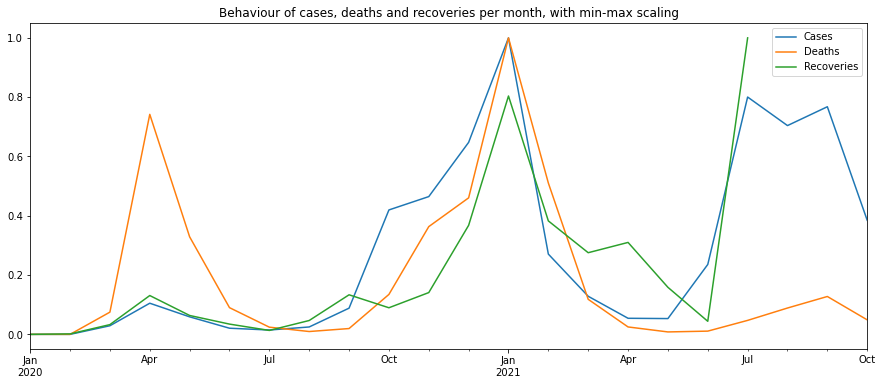

In [20]:
# Smooth the data in order to plot the behaviour of cases, deaths and recoveries in the same graph

# Apply the min-max scaling in Pandas using the .min() and .max() methods.
def min_max_scaling(df):
    # Copy the DataFrame.
    df_scaled = df.copy()
    # Apply min-max scaling.
    if isinstance(df_scaled, pd.DataFrame):
        for column in df_scaled.columns:
            df_scaled[column] = (df_scaled[column] - df_scaled[column].min()) / (df_scaled[column].max() - df_scaled[column].min())
    else:
        df_scaled = (df_scaled - df_scaled.min()) / (df_scaled.max() - df_scaled.min())

    return df_scaled

# Call the min_max_scaling function.
covid_month_cases_inc_scaled = min_max_scaling(covid_month_cases_inc)
covid_month_deaths_inc_scaled = min_max_scaling(covid_month_deaths_inc)
covid_month_recoveries_inc_scaled = min_max_scaling(covid_month_recoveries_inc)


# Plot the data
f, ax = plt.subplots(figsize=(15, 6))
covid_month_cases_inc_scaled.plot(label='Cases')
covid_month_deaths_inc_scaled.plot(label='Deaths')
covid_month_recoveries_inc_scaled.plot(label='Recoveries')

# remove titles and ticks from axis
ax.set(xlabel=None)
ax.set(title='Behaviour of cases, deaths and recoveries per month, with min-max scaling')
ax.legend()

### 4.2. Deaths per region

In [21]:
# View all Province/State to create Sub DataFrames
for i in covid['Province/State'].unique():
    print(i)

Anguilla
Bermuda
British Virgin Islands
Cayman Islands
Channel Islands
Falkland Islands (Malvinas)
Gibraltar
Isle of Man
Montserrat
Saint Helena, Ascension and Tristan da Cunha
Turks and Caicos Islands
Others


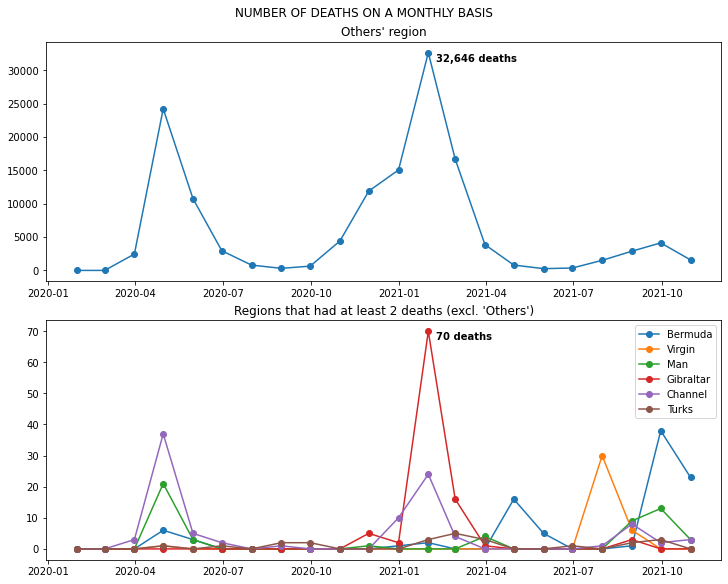

In [22]:
# Create Sub DataFrames per each region
anguilla = covid[covid["Province/State"] =='Anguilla']
bermuda = covid[covid["Province/State"] =='Bermuda']
virgin = covid[covid["Province/State"] =='British Virgin Islands']
cayman = covid[covid["Province/State"] =='Cayman Islands']
channel = covid[covid["Province/State"] =='Channel Islands']
malvinas = covid[covid["Province/State"] =='Falkland Islands (Malvinas)']
gibraltar = covid[covid["Province/State"] =='Gibraltar']
man = covid[covid["Province/State"] =='Isle of Man']
montserrat = covid[covid["Province/State"] =='Montserrat']
saint = covid[covid["Province/State"] =='Saint Helena, Ascension and Tristan da Cunha']
turks = covid[covid["Province/State"] =='Turks and Caicos Islands']
others = covid[covid["Province/State"] =='Others']

# Resample region data by month
anguilla_month_deaths_inc = anguilla.resample('M', on='Date')['Deaths_inc'].sum()
bermuda_month_deaths_inc = bermuda.resample('M', on='Date')['Deaths_inc'].sum()
virgin_month_deaths_inc = virgin.resample('M', on='Date')['Deaths_inc'].sum()
cayman_month_deaths_inc = cayman.resample('M', on='Date')['Deaths_inc'].sum()
channel_month_deaths_inc = channel.resample('M', on='Date')['Deaths_inc'].sum()
malvinas_month_deaths_inc = malvinas.resample('M', on='Date')['Deaths_inc'].sum()
gibraltar_month_deaths_inc = gibraltar.resample('M', on='Date')['Deaths_inc'].sum()
man_month_deaths_inc = man.resample('M', on='Date')['Deaths_inc'].sum()
montserrat_month_deaths_inc = montserrat.resample('M', on='Date')['Deaths_inc'].sum()
saint_month_deaths_inc = saint.resample('M', on='Date')['Deaths_inc'].sum()
turks_month_deaths_inc = turks.resample('M', on='Date')['Deaths_inc'].sum()
others_month_deaths_inc = others.resample('M', on='Date')['Deaths_inc'].sum()

# Plot the data in two graphs: one for Others' region, due to it's bigger numbers, and another for other regions
fig, axs = plt.subplots(2,1, constrained_layout=True)
fig.set_size_inches(10, 8)
plt.suptitle("NUMBER OF DEATHS ON A MONTHLY BASIS")

axs[0].set_title("Others' region")
axs[0].plot(others_month_deaths_inc, marker='o')
# Highlight highest value
axs[0].annotate('32,646 deaths', xy=(390,220), xycoords='axes pixels', weight='bold')

axs[1].set_title("Regions that had at least 2 deaths (excl. 'Others')")
axs[1].plot(bermuda_month_deaths_inc, label ='Bermuda', marker='o')
axs[1].plot(virgin_month_deaths_inc, label ='Virgin', marker='o')
axs[1].plot(man_month_deaths_inc, label ='Man', marker='o')
axs[1].plot(gibraltar_month_deaths_inc, label ='Gibraltar',marker='o')
# Highlight gibraltar highest value
axs[1].annotate('70 deaths', xy=(390,220), xycoords='axes pixels', weight='bold')
axs[1].plot(channel_month_deaths_inc, label ='Channel', marker='o')
axs[1].plot(turks_month_deaths_inc, label ='Turks', marker='o')
axs[1].legend()

#### Which Province/State has the highest average of deaths per day?

In [23]:
covid.groupby(["Province/State"])[["Deaths_inc"]] \
.agg(["mean"]) \
.sort_values([("Deaths_inc", "mean")], ascending=False)

,Deaths_inc
,mean
Province/State,
Others,218.729430
Channel Islands,0.158228
Gibraltar,0.153481
Bermuda,0.150316
Isle of Man,0.085443
British Virgin Islands,0.058544
Turks and Caicos Islands,0.036392
Cayman Islands,0.003165


### 4.3. Vaccionation - overall view

C:\Users\User\AppData\Local\Temp/ipykernel_10904/897763973.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:,.0f}' for x in plt.gca().get_yticks()])


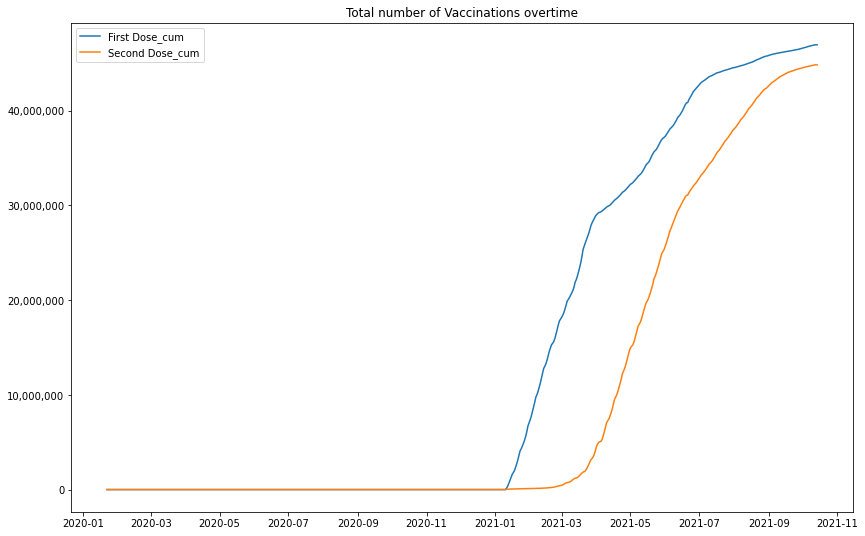

In [24]:
# Plot 1st and 2nd dose over the time
vaccines_columns = ['First Dose_cum', 'Second Dose_cum']
fig, ax = plt.subplots(figsize=(14, 9))
for each in vaccines_columns:
    sns.lineplot(estimator=sum, data = covid, x = 'Date', y = each, label = str(each), ci = None)


    
plt.title(f"Total number of Vaccinations overtime")
plt.ylabel('')
plt.gca().set_yticklabels([f'{x:,.0f}' for x in plt.gca().get_yticks()]) 
plt.xlabel('')
plt.show()

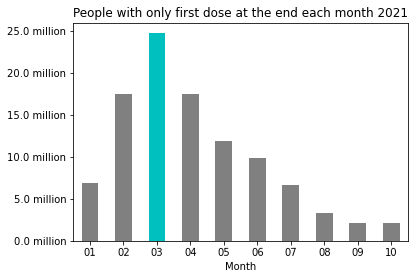

In [25]:
# Group by date and resample on a monthly basis
covid_month_only_first_inc = covid.groupby(['Date']).sum().reset_index()
covid_month_only_first_inc = covid_month_only_first_inc.resample('M', on='Date')['Only First Dose'].last()

# Remove 2020 values as the vaccination starts en 2021
covid_month_only_first_inc = covid_month_only_first_inc.drop(covid_month_only_first_inc.index[:12])

# Plot, using x-values only with the months' number
covid_month_only_first_inc.index = covid_month_only_first_inc.index.strftime('%m')

# differentiate the bar color with the max value
clrs = ['grey' if (x < max(covid_month_only_first_inc)) else 'c' for x in covid_month_only_first_inc]

fig, ax = plt.subplots()
ax = covid_month_only_first_inc.plot.bar(rot=1, title="People with only first dose at the end each month 2021", 
                                         color=clrs)
plt.xlabel('Month')

# format y-axis as million unit
def formatter(x, pos):
    return str(round(x / 1e6, 1)) + " million"

ax.yaxis.set_major_formatter(formatter)

### 4.4. Vaccionation - per region

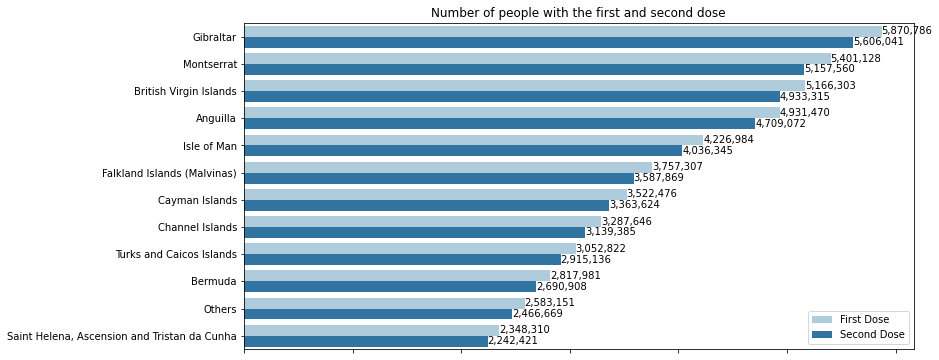

In [26]:
# Create a restructure dataframe to barplot using first and second dose as categories
aux_plot_vaccines = pd.melt(covid, id_vars=['Province/State'], value_vars=['First Dose', 'Second Dose'], ignore_index=False)

# Sort Dataset to barplot order each province from values
aux_plot_vaccines = aux_plot_vaccines.sort_values('value', ascending=False)

# Plot the data
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(estimator=sum, data=aux_plot_vaccines, x='value', y='Province/State', hue='variable', ci = None,
                palette='Paired')

# remove titles and ticks from axis
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(title='Number of people with the first and second dose')

# remove legend title
l = ax.legend()
l.set_title('')

# Format numbers to '0,000,000'
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
    
plt.show()

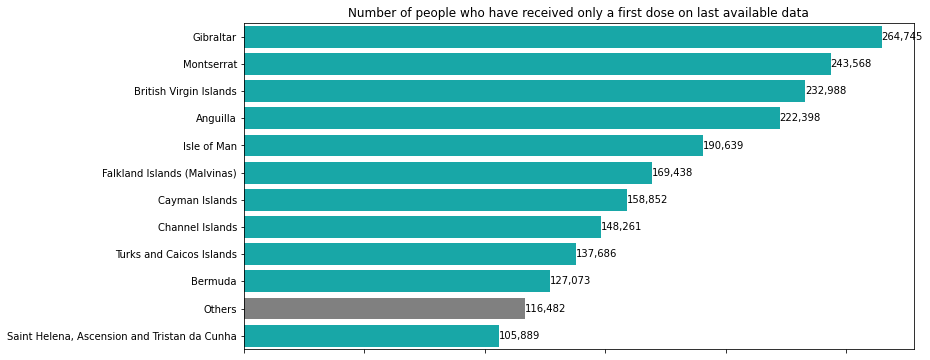

In [64]:
# Subset data only with the most recent date available
covid_lastdate = covid.sort_values(by=['Date'], ascending=False)
covid_lastdate = covid_lastdate.drop_duplicates(subset='Province/State', keep='first')

# Order subset by only first dose column
covid_lastdate = covid_lastdate.sort_values(by=['Only First Dose'], ascending=False)

# Plot the data
f, ax = plt.subplots(figsize=(12, 6))

# Define dictionary to change color of "Others" province bar as previously stands out in cases/deaths
pal_col = {province: "c" if province != "Others" else "grey" for province in covid_lastdate["Province/State"]}

ax = sns.barplot(data=covid_lastdate, x='Only First Dose', y='Province/State', ci = None,
                palette=pal_col)

# remove titles and ticks from axis
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(title='Number of people who have received only a first dose on last available data')
    
# Show values and format to '0,000,000'
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
    
plt.show()

#### Which Province/State has the highest percentage of individuals who have received a first dose but not a second dose?

In [28]:
# Calculate the highest percentage and order
covid_lastdate['% Only First Dose'] = covid_lastdate["Only First Dose"] / covid_lastdate["Second Dose_cum"]
covid_lastdate = covid_lastdate.sort_values(by=['% Only First Dose'], ascending=False)

# Format and print as percentage
covid_lastdate['% Only First Dose'] = pd.Series(["{0:.4f}%".format(val*100) for val in covid_lastdate['% Only First Dose']], 
                                   index = covid_lastdate.index)

# Reset index and start from 1 to visualize the number of regions
covid_lastdate=covid_lastdate.reset_index(drop=True)
covid_lastdate.index = covid_lastdate.index + 1

covid_lastdate[['Province/State','% Only First Dose']]


,Province/State,% Only First Dose
1,Turks and Caicos Islands,4.7231%
2,Isle of Man,4.7231%
3,Anguilla,4.7228%
4,British Virgin Islands,4.7227%
5,Cayman Islands,4.7226%
6,Channel Islands,4.7226%
7,Montserrat,4.7225%
8,Falkland Islands (Malvinas),4.7225%
9,Gibraltar,4.7225%
10,Bermuda,4.7223%


### 4.5. Heatmap - Vaccionation  & cases/deaths/recoveries data

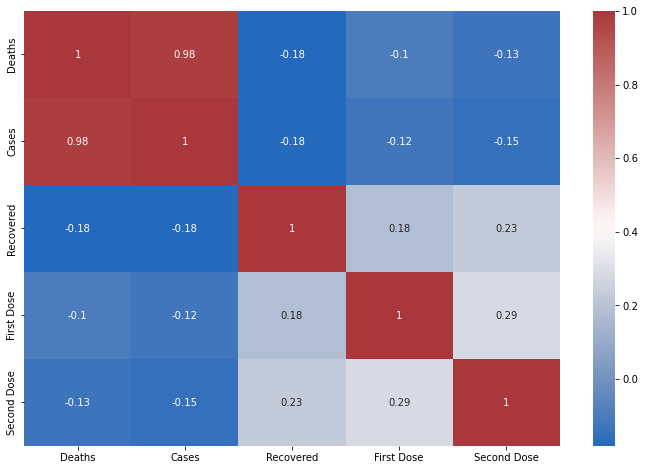

In [29]:
var_heat = covid[['Date','Deaths', 'Cases','Recovered','First Dose', 'Second Dose']]

# filter data from when starts the efficacy of the second dose vaccine 
var_heat1 = var_heat[var_heat['Date'] > '03-2021']

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(var_heat1.corr(), cmap="vlag", annot=True)
plt.show()

 ### 4.6. Hospitalised - Check for outliers and vaccionation impact

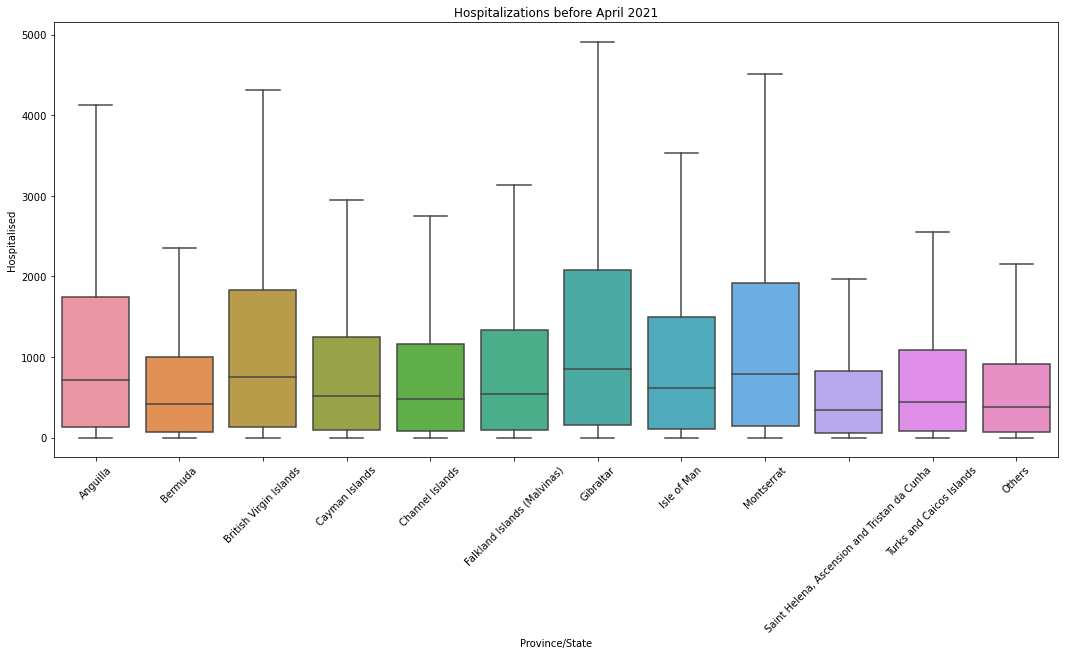

In [30]:
# Create a boxplot with Date until starts the efficacy of the second dose vaccine
covid_out_pre = covid[covid['Date'] < '04-2021']

plt.subplots(figsize=(18, 8))
plt.title("Hospitalizations before April 2021")
ax = sns.boxplot(x='Province/State', y='Hospitalised', data=covid_out_pre)
ax = plt.setp(ax.get_xticklabels(), rotation=45)

(0.0, 5000.0)

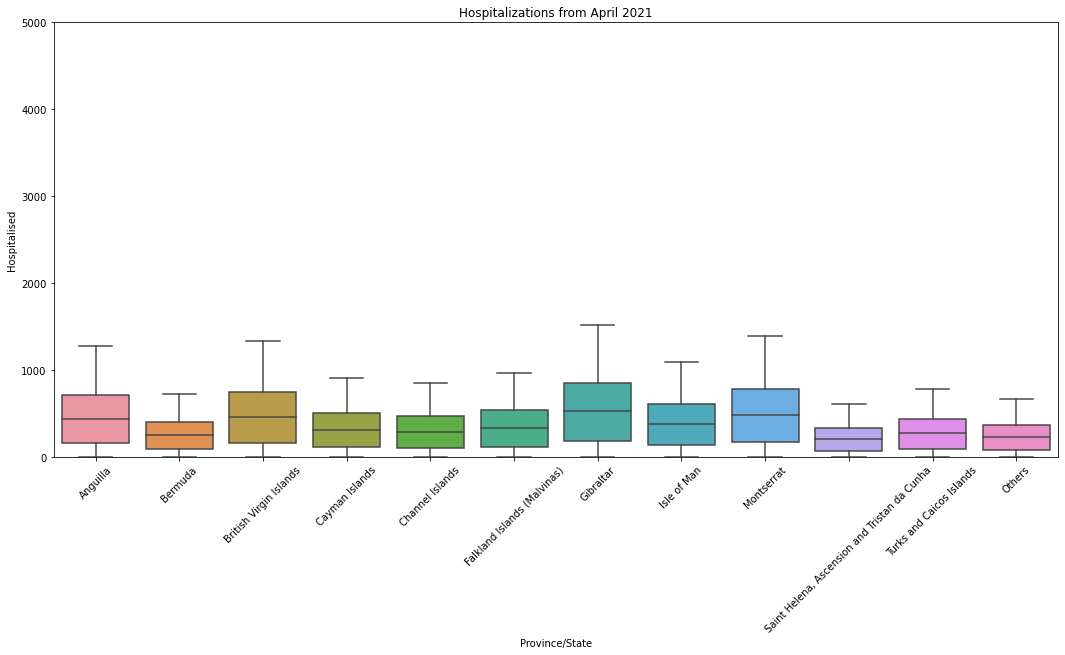

In [31]:
# Create a boxplot from the date when starts the efficacy of the second dose vaccine
covid_out_post = covid[covid['Date'] > '03-2021']

plt.subplots(figsize=(18, 8))
plt.title("Hospitalizations from April 2021")
ax = sns.boxplot(x='Province/State', y='Hospitalised', data=covid_out_post)
ax = plt.setp(ax.get_xticklabels(), rotation=45)

# keep the range of y-axis to compare with covid_out_pre
plt.ylim(0, 5000)

## 5. Twitter data analysis


In [32]:
# Explore the data
twitter.info()
twitter.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


In [33]:
# convert text column to string
twitter['text'] = twitter['text'].astype(str)

# using a lambda function, create new dataframe
twitter_text = twitter['text'].apply(lambda x: x if x.strip() != None else None)

tags = []

#create a list of values which contain a # and append it to the tags frame
for y in [x.split(' ') for x in twitter_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)

# add the count of each # to the tags frame as a new Series
tags = pd.Series(tags).value_counts()

# Display 30 most trends
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [34]:
# Store tags data in new DataFrame
df_tags = pd.DataFrame(tags).reset_index()

# label the columns
df_tags.columns = ['hashtag', 'records']

# print the dataframe with top 30 records
print(df_tags.head(30))

                 hashtag  records
0               #COVID19     1632
1        #CovidIsNotOver      472
2                 #China      262
3               #covid19      176
4               #Covid19      148
5                 #COVID      108
6                 #covid      104
7                #Greece      103
8           #coronavirus      100
9       #PeoplesVaccine.       84
10         #CoronaUpdate       84
11              #Omicron       83
12            #COVID2020       82
13            #covid19uk       80
14  #CoronavirusOutbreak       80
15      #COVID19Pandemic       80
16            #monkeypox       77
17         #globalhealth       76
18         #publichealth       72
19           #healthtech       69
20            #COVID2019       69
21          #datascience       66
22                 #data       66
23            #analytics       64
24             #Shanghai       63
25             #Covid_19       63
26    #datavisualization       63
27             #pandemic       60
28            

In [35]:
# Store new DataFrame considering lowercases in hashtags
df_tags_lower = df_tags
df_tags_lower["hashtag"]=df_tags_lower["hashtag"].str.lower()
df_tags_lower["hashtag"]=df_tags_lower["hashtag"].str.strip()

# creating a new DataFrame, grouping hastags from df_tags_lower, and order
df2 = df_tags_lower.groupby("hashtag")["records"].sum().reset_index()
df2.sort_values("records", ascending=False)

,hashtag,records
766,#covid19,2005
870,#covidisnotover,528
577,#china,286
756,#covid,239
718,#coronavirus,148
...,...,...
1696,"#inflation,",1
1697,#infographic,1
1698,#infomercials:,1
1699,#infosec,1


[Text(0, 0, '2005'),
 Text(0, 0, '528'),
 Text(0, 0, '286'),
 Text(0, 0, '239'),
 Text(0, 0, '148')]

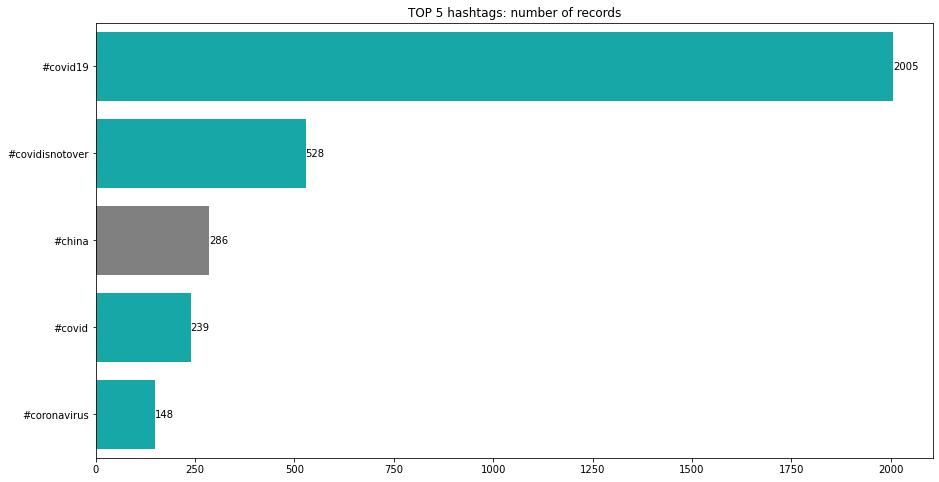

In [36]:
# Plot the top 5 hastags
plt.figure(figsize=(15,8))

# Define dictionary to change color of bar that is not related with COVID "#china"
pal = {hashtag: "c" if hashtag != "#china" else "grey" for hashtag in df2.hashtag}

ax = sns.barplot(x='records', y='hashtag', data = df2.nlargest(5, 'records'), palette=pal)

ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(title='TOP 5 hashtags: number of records')
ax.bar_label(ax.containers[0])

## W6: Evaluate and complete the analysis of external consultant

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided the partially completed Jupyter Notebook that the consultant developed as asks to evaluate and complete the Jupyter Notebook with Python code.

In [37]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [38]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv('covid_19_uk_cases.csv', index_col=['Date'], parse_dates=['Date'])
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State', 'Hospitalised']]

In [39]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [40]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,10))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.legend()


In [41]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

             Province/State  Hospitalised
Date                                     
2020-01-22  Channel Islands           0.0
2020-01-23  Channel Islands           0.0
2020-01-24  Channel Islands           0.0
2020-01-25  Channel Islands           0.0
2020-01-26  Channel Islands           0.0
...                     ...           ...
2021-10-10  Channel Islands         481.0
2021-10-11  Channel Islands         491.0
2021-10-12  Channel Islands         491.0
2021-10-13  Channel Islands           0.0
2021-10-14  Channel Islands           0.0

[632 rows x 2 columns]


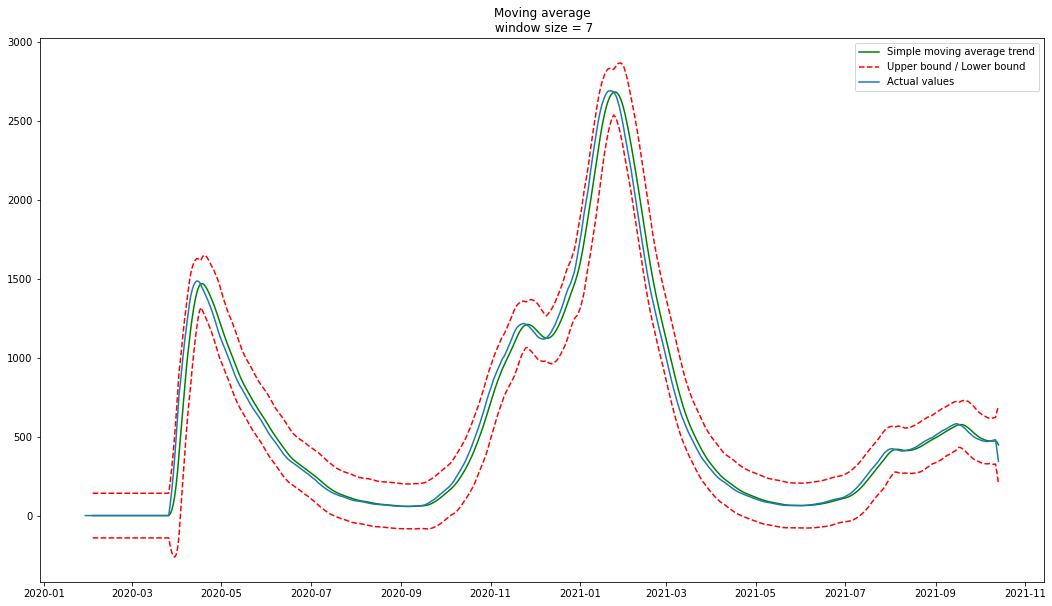

In [42]:
# Overview Dataframe
print(sample_ci)
sample_ci.dtypes

# Adjust Date type needed to moving average
#sample_ci['Date'] = pd.to_datetime(sample_ci['Date'])

# Calculate 7 day moving average
s_rolling = sample_ci['Hospitalised'].rolling(window=7).mean()
sample_ci['MA_7D']=s_rolling


plot_moving_average(sample_ci['MA_7D'], 7, plot_intervals=True)

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [43]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Hospitalised,MA_7D,error
Date,,,,
2020-03-27,Channel Islands,509.0,72.714286,436.285714
2020-03-28,Channel Islands,579.0,155.428571,423.571429
2020-03-29,Channel Islands,667.0,250.714286,416.285714


### Additional questions

**1.** What is the difference between qualitative and quantitative data? How can these be used in business predictions?

> ***Answer:*** **Qualitative data** is based on interpretation and conceptual, descriptive in nature and could be expresed in language. For example, opinions such as the twitter hashtags previously analysed, people gender, or surveys' responses. These data is particularly useful to identify certain behaviours, helping to understand certain behaviours (why happened?, how?, what?). On the other hand, **Quantitative data** is numeric, through absolute, percentage or interval values, allowing to understand how many, how much, or how often using calculations. Some examples are precisely the data analysed previously: number of cases, deaths, ratios.


**2.** Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

> ***Answer:*** Applying **continuous improvement** in this project will allow to **continuosly optmitize the insights gathered to support your decision-making**, as it allows continuously to increase the **quality of the data and analysis performed**, reflect about the methods applied, allowing also to reduce wasted time and effort through all the process. A culture of continuous improvement shoud be embrace as a core value and this project should not be an exception.

**3.** As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

> ***Answer:*** Data ethics must not be ignored as ethical practices and regulations that apply to working with data don’t always align and you can be acting legally but breaching ethical standards. Ethical practices include, among other things, how data is collected, analysed and its outcomes. In this particular case, the outcome of the data analysis can impact groups of people, emphasising the importance of following ethical standars to avoid ethical missteps.